📝 Tasks

1.Load the dataset and identify the relevant columns.

2.Use:
Engine size as the input feature
Car price as the output variable

3.Visualize the relationship between engine size and price.

4.Build a predictive model to estimate car price based on engine size.

5.Predict the price for a car with:
Engine size = 200

In [25]:
import numpy as np
import pandas as pd

# Load dataset
dataset = pd.read_csv('CarPrice_Assignment.csv')

# Select input and output
X = dataset[['enginesize']].values
y = dataset['price'].values

print(dataset[['enginesize', 'price']].head())



   enginesize    price
0         130  13495.0
1         130  16500.0
2         152  16500.0
3         109  13950.0
4         136  17450.0


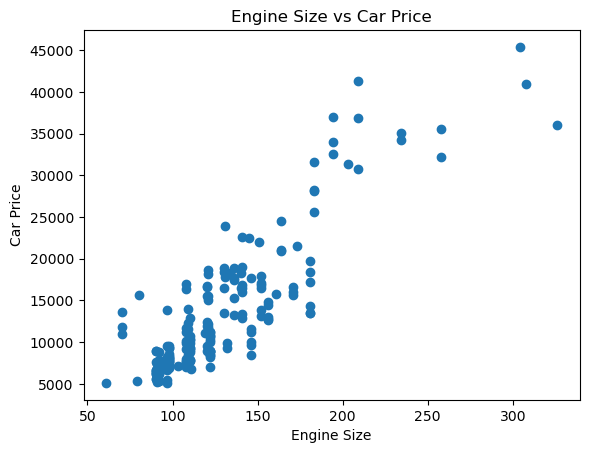

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Engine Size vs Car Price')
plt.show()


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)



Training size: (164, 1)
Testing size: (41, 1)


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial transformation
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)



LinearRegression()

In [32]:
from sklearn.metrics import r2_score

# Predictions
y_pred = model.predict(X_test_poly)

# Evaluation
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Predict for Engine Size = 200
engine_size = np.array([[200]])
engine_poly = poly.transform(engine_size)
predicted_price = model.predict(engine_poly)
print("Predicted price for engine size 200:", predicted_price[0])




R² Score: 0.8527894915155396
Predicted price for engine size 200: 27760.6083451159


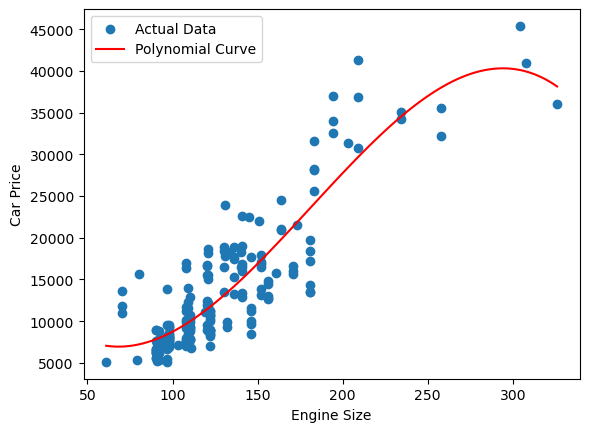

In [33]:
X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)

plt.scatter(X, y, label='Actual Data')
plt.plot(X_grid, model.predict(X_grid_poly), color='red', label='Polynomial Curve')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.legend()
plt.show()



6.Increase the flexibility of your model and observe how the curve changes.

7.Compare predictions from:
a simple straight-line model
a curved model

8.Analyze which model:
captures the trend better
gives more realistic predictions

9.valuate prediction errors and interpret them in business terms.

10.Answer the following:
Why does a straight-line model fail here?
What risk occurs if the curve becomes too flexible?
Which model would you recommend for production and why?
 

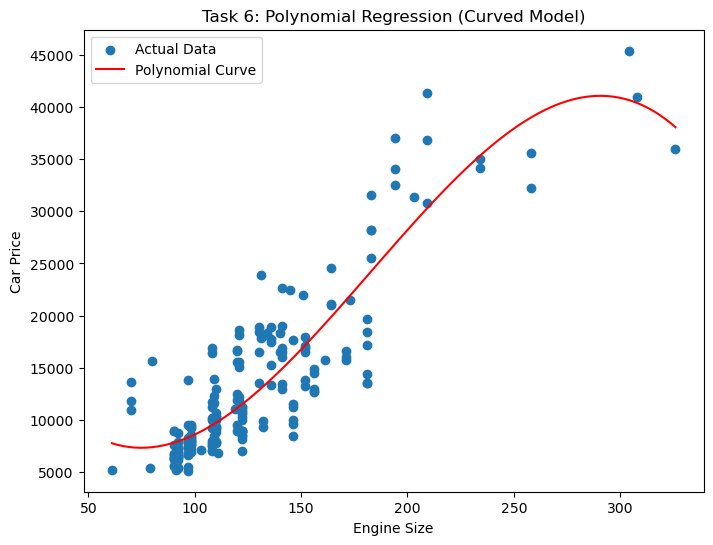

In [40]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial Regression (curved model)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X_grid, poly_model.predict(X_grid_poly), color='red', label='Polynomial Curve')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Task 6: Polynomial Regression (Curved Model)')
plt.legend()
plt.show()

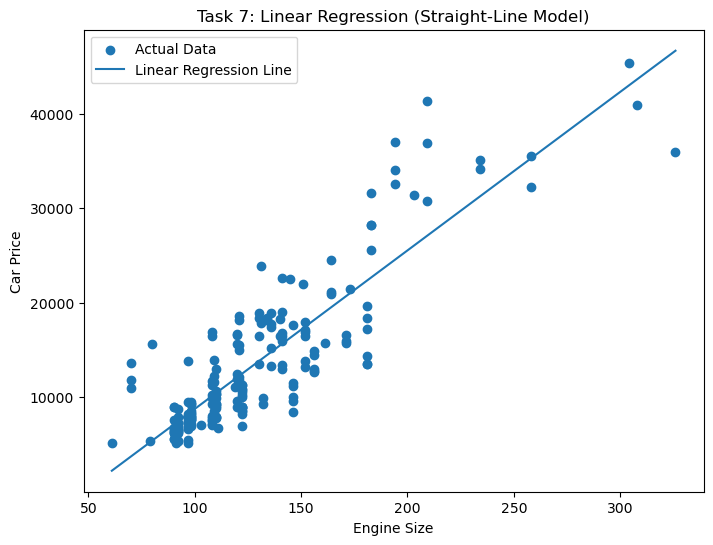

In [41]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X, y)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X_grid, linear_line, label='Linear Regression Line')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Task 7: Linear Regression (Straight-Line Model)')
plt.legend()
plt.show()

In [37]:
import numpy as np

engine_size = np.array([[200]])

# Linear prediction
linear_pred = linear_model.predict(engine_size)

# Polynomial prediction
engine_poly = poly.transform(engine_size)
poly_pred = poly_model.predict(engine_poly)

print("Linear Model Prediction:", linear_pred[0])
print("Polynomial Model Prediction:", poly_pred[0])


Linear Model Prediction: 25534.237747489224
Polynomial Model Prediction: 28207.451636903494


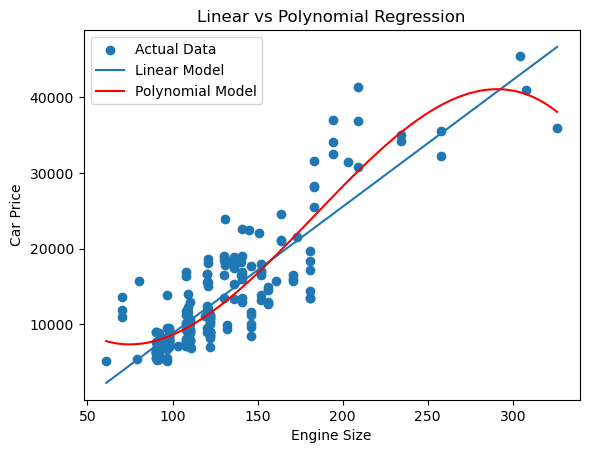

In [38]:
import matplotlib.pyplot as plt

X_grid = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predictions
linear_line = linear_model.predict(X_grid)
poly_curve = poly_model.predict(poly.transform(X_grid))

plt.scatter(X, y, label='Actual Data')
plt.plot(X_grid, linear_line, label='Linear Model')
plt.plot(X_grid, poly_curve, label='Polynomial Model', color='red')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error

# Errors
linear_mse = mean_squared_error(y, linear_model.predict(X))
poly_mse = mean_squared_error(y, poly_model.predict(X_poly))

print("Linear Model MSE:", linear_mse)
print("Polynomial Model MSE:", poly_mse)


Linear Model MSE: 14980261.40555132
Polynomial Model MSE: 13091524.999302799



1️⃣ Why does a straight-line model fail here?

A straight-line (linear) model fails because the relationship between engine size and car price is non-linear.
In reality, as engine size increases, car prices often rise at an increasing rate due to added power, luxury features, brand value, and performance upgrades.
A linear model cannot capture this curvature, leading to underfitting and inaccurate predictions, especially for higher engine sizes.

2️⃣ What risk occurs if the curve becomes too flexible?

If the curve becomes too flexible (high-degree polynomial), the model may overfit the data.
This means it starts learning noise instead of the true trend, resulting in:

Very good performance on training data

Poor predictions on unseen data

Unstable and unreliable business decisions

3️⃣ Which model would you recommend for production and why?

I would recommend a moderate-degree polynomial regression model (e.g., degree 2 or 3).
This model:

Captures the non-linear trend in car prices

Avoids excessive overfitting

Produces realistic and stable predictions

Is suitable for real-world pricing and decision-making
